# Vamos montar uma estratégia de médias móveis para USIM5: 

In [95]:
#Importamos os módulos necessários: 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb 
import numpy as np

# Definindo o ativo e a função para a estratégia:

In [86]:
#Definimos o tickers aonde queremos testar a estratégia:
ticker= 'USIM5.SA'

#Criamos a funçaõ que dará a estratégia:  
# Se a média móvel de 10 dias for maior que a média móvel de 30 dias estaremos comprados, c.c vendidos:
def strategy(base): 
    if base['10 Days SMA']>base['30 Days SMA']: 
            return base['Next Day Return']
    else: 
            return -base['Next Day Return']

# Rodando a Estratégia:

In [87]:
data_ticker = wb.DataReader(ticker,data_source='yahoo',start='2010-01-01')['Adj Close']
data_backtest = data_ticker.to_frame()
data_backtest['Daily Returns'] = data_backtest['Adj Close'].pct_change()
data_backtest['Next Day Return'] = data_backtest['Daily Returns'].shift(-1)
data_backtest['10 Days SMA'] = data_backtest['Adj Close'].rolling(window=10).mean()
data_backtest['30 Days SMA'] = data_backtest['Adj Close'].rolling(window=30).mean()
data_backtest['Strategy Returns']= data_backtest[29:].apply(strategy,axis=1).shift(1)
data_backtest['Strategy Performance']= data_backtest['Strategy Returns'][29:].fillna(0).add(1).cumprod()
data_backtest['Asset Performance'] = data_backtest['Adj Close'][29:]/data_backtest['Adj Close'][29]

# Plotamos os resultados da Estratégia:

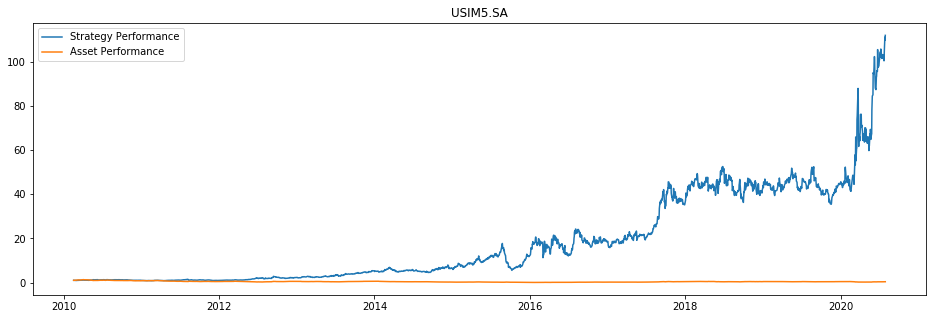

In [94]:
plt.figure(figsize=(16,5))
plt.plot(data_backtest['Strategy Performance'][29:],label="Strategy Performance")
plt.plot(data_backtest['Asset Performance'][29:],label='Asset Performance')
plt.title(ticker)
plt.legend()
plt.show()

# Plotando os resultados em log: 

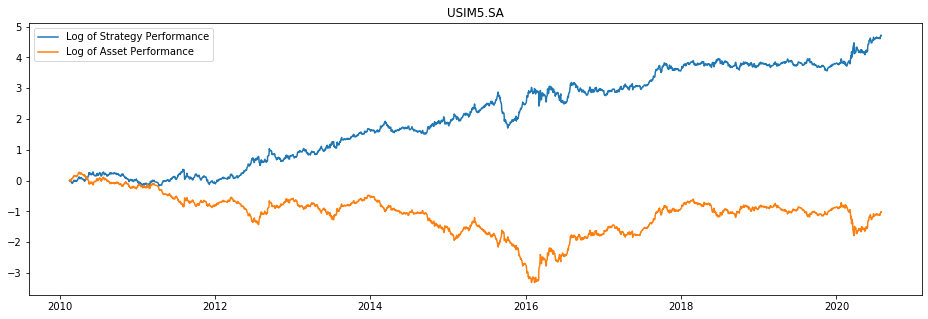

In [99]:
plt.figure(figsize=(16,5))
plt.plot(np.log(data_backtest['Strategy Performance'][29:]),label="Log of Strategy Performance")
plt.plot(np.log(data_backtest['Asset Performance'][29:]),label='Log of Asset Performance')
plt.title(ticker)
plt.legend()
plt.show()

# Fazendo um dataframe com os resultados:

In [89]:
#Montamos um dataframe com os resultados:
data_results = pd.DataFrame()
data_results['Strategy Returns']=data_backtest['Strategy Performance'].resample('Y',kind='period').last().pct_change()*100
data_results['Asset Returns']=data_backtest['Asset Performance'].resample('Y',kind='period').last().pct_change()*100
data_results.loc['Acumulado']=(data_backtest['Strategy Performance'][-1]/data_backtest['Strategy Performance'][29]-1)*100,\
                              (data_backtest['Asset Performance'][-1]/data_backtest['Asset Performance'][29]-1)*100
data_results = data_results.iloc[1:]
display(data_results)

,Strategy Returns,Asset Returns
Date,,
2011,-3.468120,-46.651364
2012,133.831282,26.108370
2013,134.207865,11.808947
2014,26.002253,-64.461649
2015,80.103702,-69.136909
2016,54.992184,164.516136
2017,90.013543,121.951254
2018,17.873414,1.762834
2019,7.807093,4.899793
